# WeatherPy JADD CHENG
----
* September 3, 2019
* Jadd Cheng

## Trend 1 Hotter closer to the equator
* Unsurprisingly, the scatter plot shows that temperatures are higher the closer one gets to the equator and are lower i.e. colder at the two poles.

## Trend 2
* Humidity.

## Trend 3

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [47]:
cities[0:10]

['amapa',
 'barentsburg',
 'ushuaia',
 'butaritari',
 'puerto ayora',
 'lazaro cardenas',
 'vanimo',
 'illoqqortoormiut',
 'sur',
 'hobart']

In [ ]:
## STARTER CODE! FOR REFERENCE! DELETE!

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
%whos

Variable           Type       Data/Info
---------------------------------------
api_key            str        a2662bf10139ce1fd5c07f1816d566bc
cities             list       n=623
citipy             module     <module 'citipy.citipy' f<...>ages\\citipy\\citipy.py'>
city               str        tsihombe
lat_lng            tuple      n=2
lat_lngs           zip        <zip object at 0x0000028D33847648>
lat_range          tuple      n=2
lats               ndarray    1500: 1500 elems, type `float64`, 12000 bytes
lng_range          tuple      n=2
lngs               ndarray    1500: 1500 elems, type `float64`, 12000 bytes
np                 module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
output_data_file   str        output_data/cities.csv
pd                 module     <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt                module     <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
requests           module     <module 'requests' from '<...>\\requ

In [7]:
import math
call_limit = 50
sets = math.ceil(len(cities)/call_limit)
print(sets)
# 60 calls a minute?
# calculate how many sets.
# round up.

13


In [8]:
# np.array_split(cities, sets)[12][29]
city_sets = np.array_split(cities, sets)
len(city_sets[0])

48

In [9]:
# start API calls

url = "http://api.openweathermap.org/data/2.5/weather"

params = {
    "appid": api_key,
    "units": "Imperial"
}

# Collect list of JSON objects. According to Stack Overflow comments, not a good idea to append directly to DataFrame.
response_list = []

print("Beginning Data Retrieval")     
print("-----------------------------")

# iterate through list of cities, only append cities with an entry on OpenWeatherMap.
for set_index, city_set in enumerate(city_sets):
    for city_index, city_set in enumerate(city_sets[set_index]):
        print(f"Processing Record {city_index+1} of Set {set_index+1} | {city_sets[set_index][city_index]}")
        params['q'] = city_sets[set_index][city_index]    
        
        response = requests.get(url, params=params)
        print(response.url)
        
        response_json = response.json()
        
        # Check that city has entry on OpenWeatherMap.
        if response_json['cod'] == 200:
            response_list.append(response_json)
        else:
            if response_json['cod'] == 404:
                print("City not found. Skipping...")
#     break
    time.sleep(10)
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | amapa
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=amapa
Processing Record 2 of Set 1 | barentsburg
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=barentsburg
Processing Record 3 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=ushuaia
Processing Record 4 of Set 1 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=butaritari
Processing Record 5 of Set 1 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=puerto+ayora
Processing Record 6 of Set 1 | lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=lazaro+cardenas
Processin

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=cam+pha
Processing Record 8 of Set 2 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=cabo+san+lucas
Processing Record 9 of Set 2 | kundiawa
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=kundiawa
Processing Record 10 of Set 2 | meyungs
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=meyungs
Processing Record 11 of Set 2 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=saskylakh
Processing Record 12 of Set 2 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=nikolskoye
Processing Record 13 of Set 2 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=port+alfred
Processing Record 13 of Set 3 | ilebo
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=ilebo
Processing Record 14 of Set 3 | boulder city
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=boulder+city
Processing Record 15 of Set 3 | kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=kudahuvadhoo
Processing Record 16 of Set 3 | koutsouras
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=koutsouras
Processing Record 17 of Set 3 | yar-sale
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=yar-sale
Processing Record 18 of Set 3 | coahuayana
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf101

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=cockburn+town
Processing Record 19 of Set 4 | benicarlo
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=benicarlo
Processing Record 20 of Set 4 | bonavista
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=bonavista
Processing Record 21 of Set 4 | merauke
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=merauke
Processing Record 22 of Set 4 | amarkantak
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=amarkantak
Processing Record 23 of Set 4 | sorvag
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=sorvag
Processing Record 24 of Set 4 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=husavik
Processing Record 25 of Set 5 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=lavrentiya
Processing Record 26 of Set 5 | prince rupert
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=prince+rupert
Processing Record 27 of Set 5 | matadi
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=matadi
Processing Record 28 of Set 5 | marv dasht
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=marv+dasht
Processing Record 29 of Set 5 | port hedland
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=port+hedland
Processing Record 30 of Set 5 | gunjur
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf101

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=aburi
Processing Record 31 of Set 6 | taga
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=taga
Processing Record 32 of Set 6 | kikwit
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=kikwit
Processing Record 33 of Set 6 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=comodoro+rivadavia
Processing Record 34 of Set 6 | mananjary
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=mananjary
Processing Record 35 of Set 6 | bara
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=bara
Processing Record 36 of Set 6 | flin flon
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d56

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=sokolo
Processing Record 37 of Set 7 | port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=port+lincoln
Processing Record 38 of Set 7 | maltahohe
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=maltahohe
Processing Record 39 of Set 7 | jalingo
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=jalingo
Processing Record 40 of Set 7 | sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=sao+filipe
Processing Record 41 of Set 7 | lata
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=lata
Processing Record 42 of Set 7 | bairnsdale
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f181

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=kabinda
Processing Record 43 of Set 8 | sembe
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=sembe
Processing Record 44 of Set 8 | singaraja
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=singaraja
Processing Record 45 of Set 8 | northam
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=northam
Processing Record 46 of Set 8 | puerto del rosario
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=puerto+del+rosario
Processing Record 47 of Set 8 | capanema
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=capanema
Processing Record 48 of Set 8 | iralaya
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=kangayam
Processing Record 1 of Set 10 | bangkok
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=bangkok
Processing Record 2 of Set 10 | myskhako
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=myskhako
Processing Record 3 of Set 10 | klyuchi
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=klyuchi
Processing Record 4 of Set 10 | paso de carrasco
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=paso+de+carrasco
Processing Record 5 of Set 10 | pleasanton
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=pleasanton
Processing Record 6 of Set 10 | bristol
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=mayumba
Processing Record 7 of Set 11 | maceio
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=maceio
Processing Record 8 of Set 11 | mackay
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=mackay
Processing Record 9 of Set 11 | chicomuselo
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=chicomuselo
Processing Record 10 of Set 11 | palu
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=palu
Processing Record 11 of Set 11 | fairmont
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=fairmont
Processing Record 12 of Set 11 | wasilla
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=turukhansk
Processing Record 13 of Set 12 | tucuman
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=tucuman
Processing Record 14 of Set 12 | mantua
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=mantua
Processing Record 15 of Set 12 | hihifo
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=hihifo
Processing Record 16 of Set 12 | akcakoca
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=akcakoca
Processing Record 17 of Set 12 | kuching
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=kuching
Processing Record 18 of Set 12 | demirci
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&u

http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=santa+catarina+de+tepehuanes
Processing Record 20 of Set 13 | anuradhapura
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=anuradhapura
Processing Record 21 of Set 13 | maneromango
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=maneromango
Processing Record 22 of Set 13 | waterloo
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=waterloo
Processing Record 23 of Set 13 | san luis
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=san+luis
Processing Record 24 of Set 13 | high level
http://api.openweathermap.org/data/2.5/weather?appid=a2662bf10139ce1fd5c07f1816d566bc&units=Imperial&q=high+level
Processing Record 25 of Set 13 | sabanagrande
http://api.openweathermap.org/data

In [10]:
response_list[0:12]

[{'coord': {'lon': -87.97, 'lat': 15.09},
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03d'}],
  'base': 'stations',
  'main': {'temp': 95,
   'pressure': 1009,
   'humidity': 53,
   'temp_min': 95,
   'temp_max': 95},
  'visibility': 10000,
  'wind': {'speed': 14.99, 'deg': 40},
  'clouds': {'all': 40},
  'dt': 1567634051,
  'sys': {'type': 1,
   'id': 7097,
   'message': 0.008,
   'country': 'HN',
   'sunrise': 1567597194,
   'sunset': 1567641748},
  'timezone': -21600,
  'id': 3603330,
  'name': 'Amapa',
  'cod': 200},
 {'coord': {'lon': -68.31, 'lat': -54.81},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}],
  'base': 'stations',
  'main': {'temp': 42.8,
   'pressure': 1028,
   'humidity': 56,
   'temp_min': 42.8,
   'temp_max': 42.8},
  'visibility': 10000,
  'wind': {'speed': 17.22, 'deg': 230},
  'clouds': {'all': 0},
  'dt': 1567634051,
  'sys': {'type': 1,
   'id': 8303,
 

In [11]:
# Use list comprehensions to collect relevant data from response JSON objects.

city_names_list = [response.get('name') for response in response_list]
cloudiness_list = [response.get('clouds').get('all') for response in response_list]
country_list = [response.get('sys').get('country') for response in response_list]
dates_list = [response.get('dt') for response in response_list]
humidity_list = [response.get('main').get('humidity') for response in response_list]
lats_list = [response.get('coord').get('lat') for response in response_list]
lngs_list = [response.get('coord').get('lon') for response in response_list]
temps_list = [response.get('main').get('temp_max') for response in response_list]
wind_list = [response.get('wind').get('speed') for response in response_list]

In [13]:
len(city_names_list)
len(cloudiness_list)

549

In [3]:
# STARTER CODE. REFERENCE ONLY. DO NOT RUN OR DELETE.

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Create a DataFrame.
city_data_df = pd.DataFrame(list(zip(city_names_list, cloudiness_list, country_list,
                                     dates_list, humidity_list, lats_list, lngs_list, 
                                     temps_list, wind_list)), 
                            columns = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])

# export city data to .csv in working directory.
city_data_df.to_csv('city_weather_data.csv', index=False)

In [15]:
city_data_df.count()

City          549
Cloudiness    549
Country       549
Date          549
Humidity      549
Lat           549
Lng           549
Max Temp      549
Wind Speed    549
dtype: int64

In [4]:
# STARTER CODE. REFERENCE ONLY. DO NOT RUN OR DELETE.

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [16]:
city_data_df.head()

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0            Amapa          40      HN  1567634051        53  15.09  -87.97   
1          Ushuaia           0      AR  1567634051        56 -54.81  -68.31   
2       Butaritari          93      KI  1567634052        73   3.07  172.79   
3     Puerto Ayora          20      EC  1567634052        65  -0.74  -90.35   
4  Lazaro Cardenas          75      MX  1567634052        23  28.39 -105.62   

   Max Temp  Wind Speed  
0     95.00       14.99  
1     42.80       17.22  
2     82.85        3.00  
3     78.80       20.80  
4     86.00        5.82

In [5]:
# STARTER CODE. REFERENCE ONLY. DO NOT RUN OR DELETE.

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0     lompoc           1      US  1534984500        44  34.64 -120.46   
1   klaksvik          92      FO  1534983600       100  62.23   -6.59   
2  bisignano           0      IT  1534981800        88  39.50   16.27   
3       hilo          90      US  1534984860        90  19.71 -155.08   
4    rikitea           8      PF  1534986579       100 -23.12 -134.97   

   Max Temp  Wind Speed  
0     77.00       11.41  
1     50.00       13.87  
2     66.20        5.82  
3     77.00        8.05  
4     69.58       19.71

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [41]:
from datetime import datetime
ts = int("1567634051")
dates_list_converted = set([datetime.utcfromtimestamp(int(ts)).strftime('%m/%d/%Y') for ts in dates_list])
weather_date = max(dates_list_converted)
weather_date

'09/04/2019'

#### Latitude vs. Temperature Plot

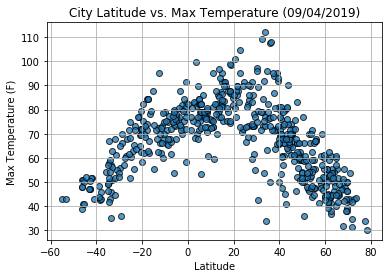

In [54]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=0.75, marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Max Temperature ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('latitude_vs_temp.png')
plt.show()

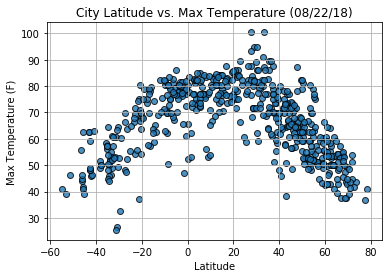

In [6]:
# STARTER CODE. REFERENCE ONLY. DO NOT RUN OR DELETE.

#### Latitude vs. Humidity Plot

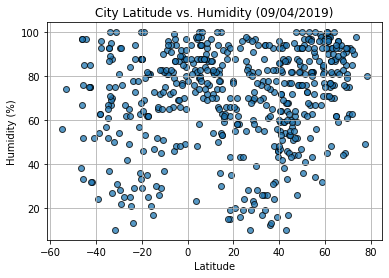

In [53]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=0.75, marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Humidity ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('lat_vs_humidity.png')
plt.show()

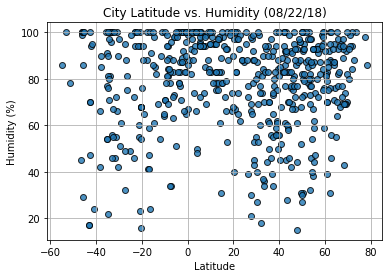

In [7]:
# STARTER CODE. REFERENCE ONLY. DO NOT RUN OR DELETE.

#### Latitude vs. Cloudiness Plot

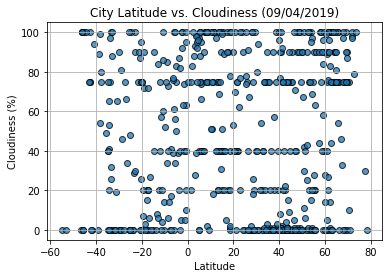

In [52]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=0.75, marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Cloudiness ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('lat_vs_cloudiness.png')
plt.show()

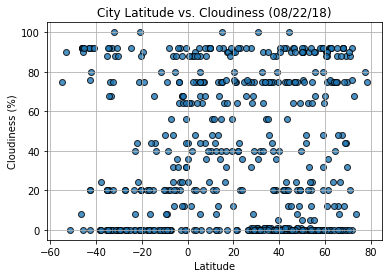

In [8]:
# STARTER CODE. REFERENCE ONLY. DO NOT RUN OR DELETE.

#### Latitude vs. Wind Speed Plot

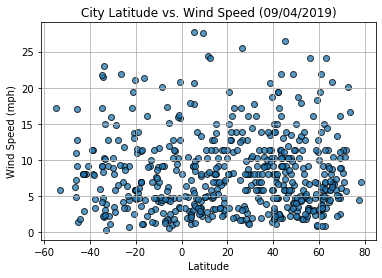

In [51]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=0.75, marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Wind Speed ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('lat_vs_windspeed.png')
plt.show()

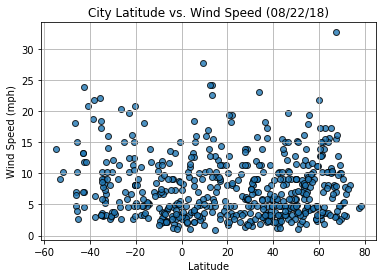

In [9]:
# STARTER CODE. REFERENCE ONLY. DO NOT RUN OR DELETE.